In [1]:
import numpy as np
import xarray as xr
# import fsspec
import matplotlib
import matplotlib.pyplot as plt
import gsw_xarray as gsw
from dask.diagnostics import ProgressBar

%matplotlib inline
plt.rcParams.update({'font.size': 13})

In [2]:
# Imports auxiliary functions
import importlib

import strucFunct2_ai
importlib.reload(strucFunct2_ai)
from strucFunct2_ai import *
import spectralanalysis
importlib.reload(spectralanalysis)
from spectralanalysis import *
import structfunc2KEflux
importlib.reload(structfunc2KEflux)
from structfunc2KEflux import *

In [3]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes

# 15 year of model output

Snapshots of KE and QG PV $q$

In [4]:
# Loads 15 year run
chunkslev = {'time': 100, 'x': 256, 'y': 256, 'lev': 2}
chunksSF15 = {'time': 100, 'mid_rbins': 53}

eddyrun_lev = xr.open_dataset('/data/SO3/manuelogv/MethodsKEFlux/QGModelRun10years.nc', chunks=chunkslev)

#### Loads 15 years time series
mSF_15 = xr.open_dataset('/data/SO3/manuelogv/MethodsKEFlux/SFQG_aver_pos_orien_5yearb.nc', chunks=chunksSF15)
mSF_15['time'] = mSF_15.time/86400
mSF_15['du1'] = mSF_15.ulls + mSF_15.utts
mSF_15

<xarray.Dataset>
Dimensions:    (time: 1824, mid_rbins: 59)
Coordinates:
    lev        int64 ...
  * time       (time) float64 5.373e+03 5.374e+03 ... 7.195e+03 7.196e+03
  * mid_rbins  (mid_rbins) float64 2.5e+03 7.5e+03 ... 2.875e+05 2.925e+05
Data variables:
    dr         (time, mid_rbins) float64 dask.array<chunksize=(100, 53), meta=np.ndarray>
    ulls       (time, mid_rbins) float64 dask.array<chunksize=(100, 53), meta=np.ndarray>
    utts       (time, mid_rbins) float64 dask.array<chunksize=(100, 53), meta=np.ndarray>
    du2        (time, mid_rbins) float64 dask.array<chunksize=(100, 53), meta=np.ndarray>
    du3        (time, mid_rbins) float64 dask.array<chunksize=(100, 53), meta=np.ndarray>
    du1        (time, mid_rbins) float64 dask.array<chunksize=(100, 53), meta=np.ndarray>
Attributes:
    description:  Structure Function Dataset
    Model:        Two-layer QG Turbulence

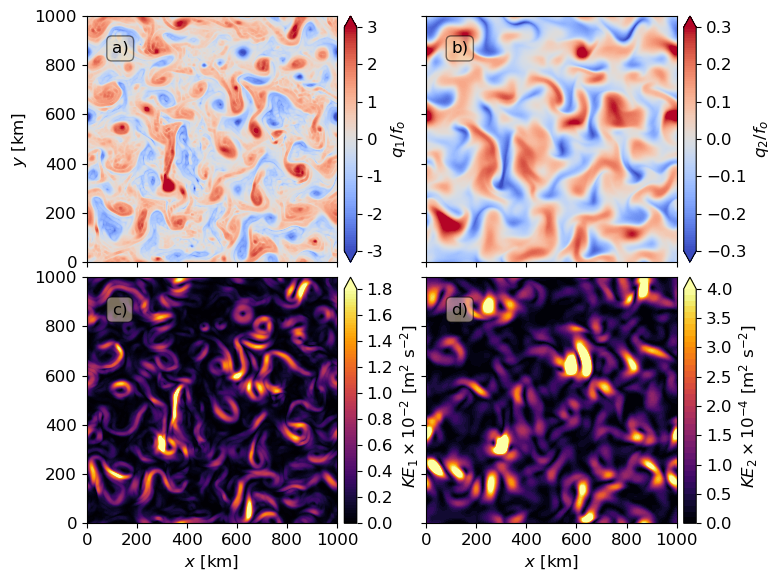

In [5]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)


ke = 0.5*(eddyrun_lev.u.isel(time=3000)**2 + eddyrun_lev.v.isel(time=3000)**2)
newy, newx = xr.broadcast(eddyrun_lev.y, eddyrun_lev.x)

fontsiz = 12
fo = 1e-5

fig2, ax2 = plt.subplots(2, 2, figsize=(8, 6))

cs1 = ax2[0, 0].contourf(newx*1e-3, newy*1e-3, eddyrun_lev.q.isel(lev=0, time=3000)/fo, 
                      np.linspace(-3, 3, 100), cmap='coolwarm', extend='both',
                      vmin=-3, vmax=3)
# ax2[0, 0].set_xlabel('$x$ [km]', fontsize=fontsiz)
ax2[0, 0].set_ylabel('$y$ [km]', fontsize=fontsiz)
# ax1[0].set_aspect('equal', 'box')
ax2[0, 0].set_xlim(0, 1000)
ax2[0, 0].set_ylim(0, 1000)
divider = make_axes_locatable(ax2[0, 0])
cax1 = divider.append_axes("right", size="5%", pad=0.07)
col1=fig2.colorbar(cs1, cax=cax1, extend='both')
col1.set_label('$q_1/f_o$', fontsize=fontsiz)
col1.set_ticks(np.arange(-3, 4, 1))
col1.set_ticklabels(np.arange(-3, 4, 1), fontsize=12)
col1.ax.tick_params(labelsize=fontsiz) 
ax2[0, 0].tick_params(axis='both', labelsize=fontsiz)
ax2[0, 0].text(0.1, 0.85, 'a)', fontsize=fontsiz, bbox=props, transform=ax2[0, 0].transAxes)
ax2[0, 0].set_xticklabels([])


cs2 = ax2[0, 1].contourf(newx*1e-3, newy*1e-3, eddyrun_lev.q.isel(lev=1, time=3000)/fo, 
                      np.linspace(-0.3, 0.3, 100), cmap='coolwarm', extend='both',
                      vmin=-0.3, vmax=0.3)
# ax2[0, 1].set_xlabel('$x$ [km]', fontsize=fontsiz)
# ax1[1].set_ylabel('y', fontsize=fontsiz)
# ax1[1].set_aspect('equal', 'box')
ax2[0, 1].set_xlim(0, 1000)
ax2[0, 1].set_ylim(0, 1000)
divider = make_axes_locatable(ax2[0, 1])
cax2 = divider.append_axes("right", size="5%", pad=0.07)
col2=fig2.colorbar(cs2, cax=cax2, extend='both')
col2.set_label('$q_2/f_o$', fontsize=fontsiz)
col2.set_ticks(np.arange(-0.3, 0.4, 0.1))
# col2.set_ticklabels(np.arange(-0.3, 0.4, 0.1))
col2.ax.tick_params(labelsize=fontsiz)
ax2[0, 1].tick_params(axis='both', labelsize=fontsiz)
ax2[0, 1].text(0.1, 0.85, 'b)', fontsize=fontsiz, bbox=props, transform=ax2[0, 1].transAxes)
ax2[0, 1].set_xticklabels([])
ax2[0, 1].set_yticklabels([])


cs3 = ax2[1, 0].contourf(newx*1e-3, newy*1e-3, ke.isel(lev=0)*1e2, np.arange(0, 1.82, 0.02), 
                         vmin=0, vmax= 1.8, cmap='inferno', extend='max')
ax2[1, 0].set_xlabel('$x$ [km]', fontsize=fontsiz)
# ax2[1, 0].set_ylabel('$y$ [km]', fontsize=fontsiz)
# ax1[1].set_ylabel('y', fontsize=fontsiz)
# ax1[1].set_aspect('equal', 'box')
ax2[1, 0].set_xlim(0, 1000)
ax2[1, 0].set_ylim(0, 1000)
divider = make_axes_locatable(ax2[1, 0])
cax3 = divider.append_axes("right", size="5%", pad=0.07)
col3 = fig2.colorbar(cs3, cax=cax3)
col3.set_label('$KE_1 \\times 10^{-2}$ [m$^2$ s$^{-2}$]', fontsize=fontsiz)
# col3.set_ticks(np.arange(0, 2.0, 0.3))
# col3.set_ticklabels(np.arange(0, 2.0, 0.3))
col3.ax.tick_params(labelsize=fontsiz) 
ax2[1, 0].tick_params(axis='both', labelsize=fontsiz)
ax2[1, 0].text(0.1, 0.85, 'c)', fontsize=fontsiz, bbox=props, transform=ax2[1, 0].transAxes)


cs4 = ax2[1, 1].contourf(newx*1e-3, newy*1e-3, ke.isel(lev=1)*1e4, np.arange(0, 4.1, 0.1), 
                         vmin=0, vmax= 4.0, cmap='inferno', extend='max')
ax2[1, 1].set_xlabel('$x$ [km]', fontsize=fontsiz)
# ax1[1].set_ylabel('y', fontsize=fontsiz)
# ax1[1].set_aspect('equal', 'box')
ax2[1, 1].set_xlim(0, 1000)
ax2[1, 1].set_ylim(0, 1000)
divider = make_axes_locatable(ax2[1, 1])
cax4 = divider.append_axes("right", size="5%", pad=0.07)
col4 = fig2.colorbar(cs4, cax=cax4, extend='both')
col4.set_label('$KE_2 \\times 10^{-4}$ [m$^2$ s$^{-2}$]', fontsize=fontsiz)
# col4.set_ticks(np.arange(-4, 5, 1))
# col4.set_ticklabels(np.arange(-4, 5, 1))
col4.ax.tick_params(labelsize=fontsiz) 
ax2[1, 1].tick_params(axis='both', labelsize=fontsiz)
ax2[1, 1].text(0.1, 0.85, 'd)', fontsize=fontsiz, bbox=props, transform=ax2[1, 1].transAxes)
ax2[1, 1].set_yticklabels([])


fig2.tight_layout(h_pad= 0, w_pad=-0)
# fig2.savefig('./FiguresMethodsPaper/fig_QGmodel_KE_q.png', bbox_inches = 'tight', format='png', dpi=500)

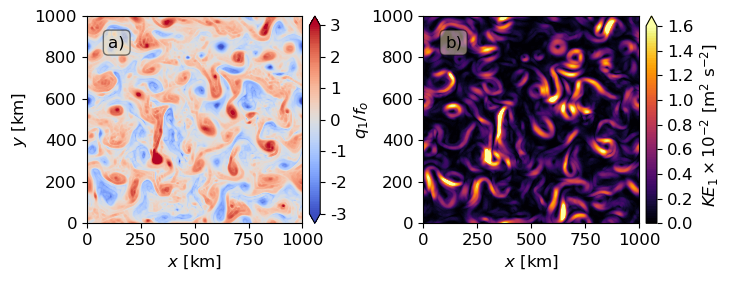

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)


ke = 0.5*(eddyrun_lev.u.isel(time=3000)**2 + eddyrun_lev.v.isel(time=3000)**2)
newy, newx = xr.broadcast(eddyrun_lev.y, eddyrun_lev.x)

fontsiz = 12
fo = 1e-5

fig2, ax2 = plt.subplots(1, 2, figsize=(7.5, 3))

cs1 = ax2[0].contourf(newx*1e-3, newy*1e-3, eddyrun_lev.q.isel(lev=0, time=3000)/fo, 
                      np.linspace(-3, 3, 100), cmap='coolwarm', extend='both',
                      vmin=-3, vmax=3)
ax2[0].set_xlabel('$x$ [km]', fontsize=fontsiz)
ax2[0].set_ylabel('$y$ [km]', fontsize=fontsiz)
ax2[0].set_xlim(0, 1000)
ax2[0].set_ylim(0, 1000)
divider = make_axes_locatable(ax2[0])
cax1 = divider.append_axes("right", size="5%", pad=0.07)
col1=fig2.colorbar(cs1, cax=cax1, extend='both')
col1.set_label('$q_1/f_o$', fontsize=fontsiz)
col1.set_ticks(np.arange(-3, 4, 1))
col1.set_ticklabels(np.arange(-3, 4, 1), fontsize=12)
col1.ax.tick_params(labelsize=fontsiz) 
ax2[0].tick_params(axis='both', labelsize=fontsiz)
ax2[0].text(0.1, 0.85, 'a)', fontsize=fontsiz, bbox=props, transform=ax2[0].transAxes)


cs3 = ax2[1].contourf(newx*1e-3, newy*1e-3, ke.isel(lev=0)*1e2, np.arange(0, 1.62, 0.02), 
                         vmin=0, vmax= 1.6, cmap='inferno', extend='max')
ax2[1].set_xlabel('$x$ [km]', fontsize=fontsiz)
ax2[1].set_xlim(0, 1000)
ax2[1].set_ylim(0, 1000)
divider = make_axes_locatable(ax2[1])
cax3 = divider.append_axes("right", size="5%", pad=0.07)
col3 = fig2.colorbar(cs3, cax=cax3)
col3.set_label('$KE_1 \\times 10^{-2}$ [m$^2$ s$^{-2}$]', fontsize=fontsiz)
col3.set_ticks(np.arange(0, 1.8, 0.2))
col3.ax.tick_params(labelsize=fontsiz) 
ax2[1].tick_params(axis='both', labelsize=fontsiz)
ax2[1].text(0.1, 0.85, 'b)', fontsize=fontsiz, bbox=props, transform=ax2[1].transAxes)

fig2.tight_layout(h_pad= 0, w_pad=-0)
fig2.savefig('./FiguresMethodsPaper/fig_QGmodel_KE_q.png', bbox_inches = 'tight', format='png', dpi=500)

### Estimates Rossby number, decorrelation time scale and degrees of freedom

\begin{equation}
    Ro = \frac{\sqrt{D2(r)}}{fr}
\end{equation}


\begin{equation}
    T_{corr} = \frac{r}{\sqrt{D2(r)}}
\end{equation}

\begin{equation}
    N =\frac{T_{corr}}{T_{tot}}
\end{equation}

In [7]:
# Calculates degrees of freedom
nyears = 5
yr2day = 365

# Gets the first 40 index in r
indx = 1
indf = 40

Tmax = yr2day*nyears*86400

qg_tscale3 = timescale(mSF_15.du2.mean(dim='time').values[indx:indf], 
                       mSF_15.dr.mean(dim='time').values[indx:indf])

qg_dof = Tmax/qg_tscale3

nu3 = np.sqrt(qg_dof)

# First-order structure functions
### First-order structure functions are estimated to test if the simulated flow is homogeneous (i.e., mean flow is $\sim0$)

We calculate

\begin{equation}
    D1(r) = D1_L(r) + D1_T(r) = \langle\delta u_L(\mathbf{s}, \mathbf{r}, t)\rangle + \langle\delta u_T(\mathbf{s}, \mathbf{r}, t)\rangle,
\end{equation}

where $D1(r)$ is the first-order structure function (sum of the longitudinal $D1_L(r)$ and transversal $D1_T(r)$ components), $\mathbf{s}$, $\mathbf{r}$, $t$ are the position vector, the distance vector, and time (days), respectively. $r=|\mathbf{r}|$, and $\langle()\rangle$ indicate ensemble average. 

Here, we also perform an average over all locations $\mathbf{s}$ and orientations $\overline{()}$ to construct daily estimates of $\overline{\delta u1}(r, t)=\overline{\delta u_L(\mathbf{s}, \mathbf{r}, t)} + \overline{\delta u_T(\mathbf{s}, \mathbf{r}, t)}$, which produces Gaussian-distributed quantities per central limit theorem.

#### Calculates PDFs of $\overline{\delta u1}(r,t)$

In [8]:
# First-order structure function
from scipy.stats import norm
from xhistogram.xarray import histogram

# First order structure function
sf1_mn = mSF_15.du1.mean(dim='time')[indx:indf]
sf1_std = mSF_15.du1.std(dim='time')[indx:indf]
rr1 = mSF_15.dr.mean(dim='time')[indx:indf].values
du1 = mSF_15.du1.isel(mid_rbins=np.arange(indx, indf)).chunk({'mid_rbins':len(mSF_15.mid_rbins), 'time': 100})


in1 = 2
in2 = 5
in3 = 10
in4 = 18

du1r = 0.4

dull_mn = mSF_15.ulls.mean(dim='time')[indx:indf]
dutt_mn = mSF_15.utts.mean(dim='time')[indx:indf]
dull_std = mSF_15.ulls.std(dim='time')[indx:indf]
dutt_std = mSF_15.utts.std(dim='time')[indx:indf]


# Bins
d1_bins = np.arange(-3, 3.5, du1r)#np.arange(-1e-2, 1e-2, 6e-5)/sf1_std[in1].values
d2_bins = np.arange(-3, 3.5, du1r)#np.arange(-1e-2, 1e-2, 2e-4)/sf1_std[in2].values
d3_bins = np.arange(-3, 3.5, du1r)#np.arange(-1e-2, 1e-2, 6e-4)/sf1_std[in3].values
d4_bins = np.arange(-3, 3.5, du1r)#np.arange(-1e-2, 1e-2, 1e-3)/sf1_std[in4].values


# Histograms
sf1h0 =  histogram(du1.isel(mid_rbins=in1)/sf1_std[in1].values, bins=d1_bins, dim=['time'], density=True)
sf1h2 = histogram(du1.isel(mid_rbins=in2)/sf1_std[in2].values, bins=d2_bins, dim=['time'], density=True)
sf1h10 = histogram(du1.isel(mid_rbins=in3)/sf1_std[in3].values, bins=d3_bins, dim=['time'], density=True)
sf1h15 = histogram(du1.isel(mid_rbins=in4)/sf1_std[in4].values, bins=d4_bins, dim=['time'], density=True)

# Constructs Gaussian
sf1p0 = norm.pdf(d1_bins, sf1_mn[in1]/sf1_std[in1].values, 1)
sf1p2 = norm.pdf(d2_bins, sf1_mn[in2]/sf1_std[in2].values, 1)
sf1p10 = norm.pdf(d3_bins, sf1_mn[in3]/sf1_std[in3].values, 1)
sf1p15 = norm.pdf(d4_bins, sf1_mn[in4]/sf1_std[in4].values, 1)


# Calculates kurtosis
from scipy.stats import skew, kurtosis
sf1_skew = np.zeros((len(rr1),))
sf1_kurt = sf1_skew*0.

for ii in range(len(rr1)):
    
    sf1_skew[ii] = skew(du1.isel(mid_rbins=ii).values, axis=0, bias=True)
    sf1_kurt[ii] = kurtosis(du1.isel(mid_rbins=ii).values, axis=0, fisher=True, bias=True)
#     sf1_kurt[ii] = skew(sf1.D1s.isel(rbins=ii).values)

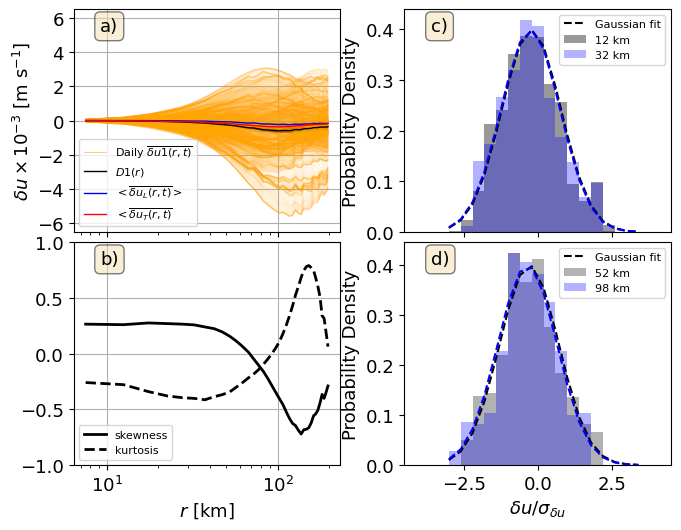

In [9]:
# Plots histograms SF1
colors = plt.cm.jet(np.linspace(0, 1, 4))

fog1 = plt.figure(figsize=(7, 5.5))

b2 = plt.subplot(2, 2, 1)
b2.semilogx(rr1*1e-3, du1.T*1e3, '-', color='orange', 
            linewidth=0.5, alpha=0.1)
b2.semilogx(0, 0, '-', color='orange', linewidth=0.5, alpha=0.8, label='Daily $\\overline{\\delta u1(r, t)}$')
b2.semilogx(rr1*1e-3, sf1_mn*1e3, 'k', linewidth=1, label='$D1(r)$')
b2.fill_between(rr1*1e-3, (sf1_mn + sf1_std/nu3)*1e3, (sf1_mn - sf1_std/nu3)*1e3, 
               alpha=1, color='black', edgecolor=None)
b2.semilogx(rr1*1e-3, dull_mn*1e3, 'b', linewidth=1, label='$<\\overline{\\delta u_{L}(r, t)}>$')
b2.fill_between(rr1*1e-3, (dull_mn + dull_std/nu3)*1e3, (dull_mn - dull_std/nu3)*1e3, 
               alpha=1, color='blue', edgecolor=None)
b2.semilogx(rr1*1e-3, dutt_mn*1e3, 'r', linewidth=1, label='$<\\overline{\\delta u_{T}(r, t)}$')
b2.fill_between(rr1*1e-3, (dutt_mn + dutt_std/nu3)*1e3, (dutt_mn - dutt_std/nu3)*1e3, 
               alpha=1, color='red', edgecolor=None)
b2.legend(fontsize=8, loc=3, ncol=1)
b2.set_yticks(np.arange(-10, 12, 2))
b2.set_ylim(-6.5, 6.5)
# b2.set_xlabel('$r$ [km]')
b2.set_ylabel('$\\delta u \\times 10^{-3}$ [m s$^{-1}$]')
b2.text(0.1, 0.90, 'a)', bbox=props, transform=b2.transAxes)
b2.set_xticklabels([])
b2.grid()

b4 = plt.subplot(2, 2, 3)
b4.semilogx(rr1*1e-3, sf1_skew, '-k', linewidth=2, label='skewness')
b4.semilogx(rr1*1e-3, sf1_kurt, '--k', linewidth=2, label='kurtosis')
b4.legend(fontsize=8, loc=3)
b4.set_ylim(-1, 1)
b4.set_xlabel('$r$ [km]')
b4.text(0.1, 0.90, 'b)', bbox=props, transform=b4.transAxes)
b4.grid()


b3 = plt.subplot(2, 2, 2)
b3.bar(sf1h0.du1_bin, sf1h0, width=du1r, label="{:2.0f} km".format(rr1[in1-1]*1e-3), 
        color='k', edgecolor=None, alpha=0.4)
b3.plot(d1_bins, sf1p0, '--', color='k', label='Gaussian fit')
b3.bar(sf1h2.du1_bin, sf1h2, width=du1r, label="{:2.0f} km".format(rr1[in2]*1e-3), 
        color='b', edgecolor=None, alpha=0.3)
b3.plot(d2_bins, sf1p2, '--', color='b')
b3.set_xlim(-4.5, 4.5)
b3.set_ylabel('Probability Density')
b3.legend(loc=1, fontsize=8)
b3.text(0.1, 0.90, 'c)', bbox=props, transform=b3.transAxes)
b3.set_xticklabels([])

b1 = plt.subplot(2, 2, 4)
b1.bar(sf1h10.du1_bin, sf1h10, width=du1r, label="{:2.0f} km".format(rr1[in3-1]*1e-3), 
        color='k', edgecolor=None, alpha=0.3)
b1.plot(d3_bins, sf1p10, '--', color='k', label='Gaussian fit')
b1.bar(sf1h15.du1_bin, sf1h15, width=du1r, label="{:2.0f} km".format(rr1[in4]*1e-3), 
        color='b', edgecolor=None, alpha=0.3)
b1.plot(d4_bins, sf1p15, '--', color='b')
b1.set_xlim(-4.5, 4.5)
b1.set_ylabel('Probability Density')
b1.legend(loc=1, fontsize=8)
b1.set_xlabel('$\\delta u/\\sigma_{\\delta u}$')
b1.text(0.1, 0.90, 'd)', bbox=props, transform=b1.transAxes)


fog1.tight_layout(h_pad=-0.1, w_pad=0.13)
plt.savefig('./FiguresMethodsPaper/fig_qg_hist_sf1_N.png', bbox_inches = 'tight', format='png', dpi=500)

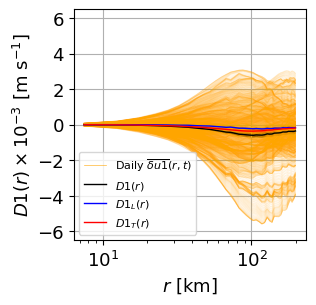

In [10]:
# Plots histograms SF1
colors = plt.cm.jet(np.linspace(0, 1, 4))

fog1 = plt.figure(figsize=(3, 3))

aC = plt.subplot(1, 1, 1)
aC.semilogx(rr1*1e-3, du1.T*1e3, '-', color='orange', 
            linewidth=0.5, alpha=0.1)
aC.semilogx(0, 0, '-', color='orange', linewidth=0.5, alpha=0.8, label='Daily $\\overline{\\delta u1}(r, t)$')
aC.semilogx(rr1*1e-3, sf1_mn*1e3, 'k', linewidth=1, label='$D1(r)$')
aC.fill_between(rr1*1e-3, (sf1_mn + sf1_std/nu3)*1e3, (sf1_mn - sf1_std/nu3)*1e3, 
               alpha=1, color='black', edgecolor=None)
aC.semilogx(rr1*1e-3, dull_mn*1e3, 'b', linewidth=1, label='$D1_L(r)$')
aC.fill_between(rr1*1e-3, (dull_mn + dull_std/nu3)*1e3, (dull_mn - dull_std/nu3)*1e3, 
               alpha=1, color='blue', edgecolor=None)
aC.semilogx(rr1*1e-3, dutt_mn*1e3, 'r', linewidth=1, label='$D1_T(r)$')
aC.fill_between(rr1*1e-3, (dutt_mn + dutt_std/nu3)*1e3, (dutt_mn - dutt_std/nu3)*1e3, 
               alpha=1, color='red', edgecolor=None)
aC.legend(fontsize=8, loc=3)
aC.set_yticks(np.arange(-10, 12, 2))
aC.set_ylim(-6.5, 6.5)
aC.set_xlabel('$r$ [km]')
aC.set_ylabel('$D1(r) \\times 10^{-3}$ [m s$^{-1}$]')
# aC.set_xticklabels([])
aC.grid()
plt.savefig('./FiguresMethodsPaper/fig_qg_D1_du1_N.png', bbox_inches = 'tight', format='png', dpi=500)

# Calculates KE spectra usin xrft and self-code

Converts KE spectra to second-order structure function using the relationship:

\begin{align}
D2 = 2\int^\infty_0 E(k)[1 - J_0(ks)]dk
\end{align}

$k$ is in rad per km

### Calculates $E(k)$ for hourly snapshots

Corroborates that E(k) is insesitive to the choice of using daily-averaged fields to hourly snapshots

In [11]:
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

# Computes spectra and SF2 of model run
i1 = -2 - yr2day * nyears
time3y = np.arange(i1, i1 + yr2day * nyears)

# Spectral window in space
ix, jx = eddyrun_lev.u.isel(lev=0, time=0).T.shape

u1 = eddyrun_lev.u.isel(time=time3y, lev=0)
v1 = eddyrun_lev.v.isel(time=time3y, lev=0)

x = eddyrun_lev.x.values
y = eddyrun_lev.y.values

dx = np.mean(np.diff(x, axis=0))
dy = np.mean(np.diff(y, axis=0))

# Calculates expected wavenumber to allocate memory
l1, l2 = ix, jx
df1 = 1. / (l1 * dy)
df2 = 1. / (l2 * dx)
f1Ny = 1. / (2 * dy)
f2Ny = 1. / (2 * dx)

f1 = np.arange(-f1Ny, f1Ny, df1)
f2 = np.arange(-f2Ny, f2Ny, df2)

Eu = np.zeros((len(f1), len(f2), len(u1.time)))
Ev = np.zeros((len(f1), len(f2), len(v1.time)))

# Optimized spec_est2 function (assuming it's heavy on computation)
def compute_spec(ii):
    # Access data once and pass to spec_est2
    u_data = u1.isel(time=ii).values.T
    v_data = v1.isel(time=ii).values.T
    
    result_u = spec_est2(u_data, dy, dx, win=False)
    result_v = spec_est2(v_data, dy, dx, win=False)
    
    Eu_res, l, k, dl, dk, flNy, fkNy = result_u  # Adjust according to actual return values
    Ev_res, l, k, dl, dk, flNy, fkNy = result_v  # Same here
    return Eu_res, Ev_res, k, l, dk, dl

# Use ThreadPoolExecutor to parallelize the loop
with ThreadPoolExecutor() as executor:
    results = list(tqdm(executor.map(compute_spec, range(len(u1.time))), total=len(u1.time)))

# Unpack results into Eu and Ev and extract k, l, dk, dl from the first iteration
for ii, (Eu_res, Ev_res, k, l, dk, dl) in enumerate(results):
    Eu[:, :, ii] = Eu_res
    Ev[:, :, ii] = Ev_res
    
    # Now k, l, dk, dl hold the values from the current iteration (if needed)
    if ii == 0:  # Just save k, l, dk, dl from the first iteration
        k_first, l_first, dk_first, dl_first = k, l, dk, dl

100%|███████████████████████████████████████| 1825/1825 [01:38<00:00, 18.60it/s]


In [12]:
# Converts to isotropic EKE spectrum
EKEspc = 0.5*(Eu + Ev) # KE 2D spectrum
# EKEiso = np.zeros(())

EKEiso, Kiso = Ek2DEkiso(EKEspc, k, l, dk, dl)

/home/mog002/spectralanalysis.py:181: RuntimeWarning: divide by zero encountered in scalar divide
  dtheta = (2*np.pi)/(f.sum())
/home/mog002/miniconda3/envs/pygmt/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mog002/miniconda3/envs/pygmt/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


### Uses XRTF python library

In [13]:
# Uses xrft to calculate isotropic Power Spectrum Density
import xrft

u0 = u1.chunk({'x': 256, 'y': 256, 'time': 1000})
v0 = v1.chunk({'x': 256, 'y': 256, 'time': 1000})

uiso0 = xrft.isotropic_power_spectrum(u0, dim=['x','y'],
                                      window=None, detrend=None, scaling='density')
viso0 = xrft.isotropic_power_spectrum(v0, dim=['x','y'], 
                                      window=None, detrend=None, scaling='density')

# Removes mean
uiso0_dm = xrft.isotropic_power_spectrum(u0-u0.mean(dim='time'), dim=['x','y'], 
                                         window=None, detrend=None, scaling='density')
viso0_dm = xrft.isotropic_power_spectrum(v0-v0.mean(dim='time'), dim=['x','y'], 
                                         window=None, detrend=None, scaling='density')

with ProgressBar():
    # KE isotropic wavenumber spectrum
    ekeiso0 = .5*(uiso0 + viso0).compute()
    ekeiso0_dm = 0.5*(uiso0_dm + viso0_dm).compute()

[##                                      ] | 5% Completed | 102.80 ms

/home/mog002/miniconda3/envs/pygmt/lib/python3.11/site-packages/xrft/xrft.py:1054: FutureWarning: Isotropic wavenumber larger than the Nyquist wavenumber may result.
  warnings.warn(msg, FutureWarning)
/home/mog002/miniconda3/envs/pygmt/lib/python3.11/site-packages/xrft/xrft.py:1054: FutureWarning: Isotropic wavenumber larger than the Nyquist wavenumber may result.
  warnings.warn(msg, FutureWarning)
/home/mog002/miniconda3/envs/pygmt/lib/python3.11/site-packages/xrft/xrft.py:1054: FutureWarning: Isotropic wavenumber larger than the Nyquist wavenumber may result.
  warnings.warn(msg, FutureWarning)
/home/mog002/miniconda3/envs/pygmt/lib/python3.11/site-packages/xrft/xrft.py:1054: FutureWarning: Isotropic wavenumber larger than the Nyquist wavenumber may result.
  warnings.warn(msg, FutureWarning)


[########################################] | 100% Completed | 21.45 ss
[########################################] | 100% Completed | 21.81 ss


### Converts from $E(k)$ to $D2(r)$

In [14]:
# Converts EKE isotropic spectrum to SF2
r3 = mSF_15.dr.mean(dim='time')[indx:indf].values
sf2_mean = mSF_15.du2.mean(dim='time')[indx:indf]
sf2_std = mSF_15.du2.std(dim='time')[indx:indf]
rr3 = mSF_15.dr.mean(dim='time')[indx:indf].values


sf2_EKEiso = E2SF2(ekeiso0.mean(dim='time').values, ekeiso0.freq_r.values*2*np.pi, 
                   ekeiso0.freq_r.diff(dim='freq_r').mean().values*2*np.pi, rr3)

In [15]:
# Loads the last year of 15-year run outputs at hourly dt
eddy1y = xr.open_dataset('/data/SO3/manuelogv/MethodsKEFlux/QGModelRun1year_1hr.nc', chunks={'time': 100, 'x': 256, 'y': 256})
u2 = eddy1y.u.isel(lev=0)
v2 = eddy1y.v.isel(lev=0)

# Calculates E(k)
uiso1y = xrft.isotropic_power_spectrum(u2, dim=['x','y'], 
                                       window=None, detrend=None, scaling='density')
viso1y = xrft.isotropic_power_spectrum(v2, dim=['x','y'], 
                                       window=None, detrend=None, scaling='density')

with ProgressBar():
    ekeiso1y = .5*(uiso1y + viso1y).compute()

[                                        ] | 0% Completed | 103.55 ms

/home/mog002/miniconda3/envs/pygmt/lib/python3.11/site-packages/xrft/xrft.py:1054: FutureWarning: Isotropic wavenumber larger than the Nyquist wavenumber may result.
  warnings.warn(msg, FutureWarning)
/home/mog002/miniconda3/envs/pygmt/lib/python3.11/site-packages/xrft/xrft.py:1054: FutureWarning: Isotropic wavenumber larger than the Nyquist wavenumber may result.
  warnings.warn(msg, FutureWarning)


[########################################] | 100% Completed | 20.69 s


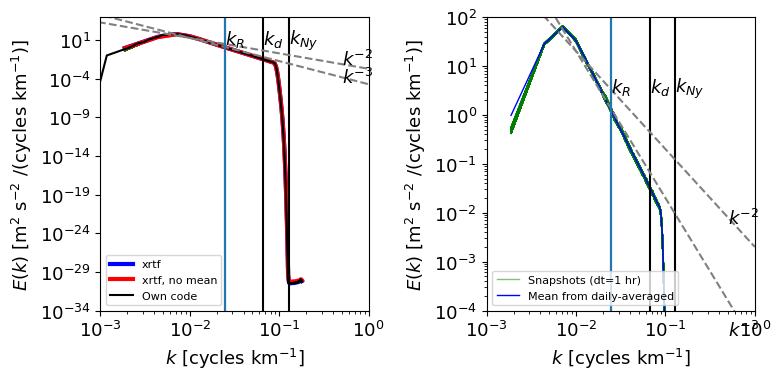

In [16]:
#### Checks that methods are correct
rd = 15e3 #Rossby radius
beta = 1.5e-11
U = 0.025
krh = np.sqrt(beta/U) # Rhines wavenumber
kny = 1/(2*3900) # Nyquist wavenumber

ks = np.array([1.e-4,1])
Es2 = .2e-2*(ks**(-2))
Es3 = .2e-4*(ks**(-3))

fug = plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.loglog(ekeiso1y.freq_r*1e3, ekeiso1y.T, color='green', alpha=0.5, 
           linewidth=0.5)
plt.loglog(ekeiso0.freq_r*1e3, ekeiso0.mean(dim='time'), '-', color='blue', 
           label='xrtf', linewidth=3)
plt.loglog(ekeiso0_dm.freq_r*1e3, ekeiso0_dm.mean(dim='time'), color='red', 
           label='xrtf, no mean', linewidth=3)
plt.loglog(Kiso*1e3, EKEiso, '-k',  label='Own code')
plt.plot(np.ones((2,))*1/rd*1e3, [1e-40, 1e4], '-k')
plt.plot(np.ones((2,))*kny*1e3, [1e-40, 1e4], '-k')
plt.plot(np.ones((2,))*krh*1e3, [1e-40, 1e4], '-k')
plt.plot(ks, Es2, '--', color='gray')
plt.plot(ks, Es3, '--', color='gray')
plt.loglog(krh*np.ones((2,))*1e3, [1e-42, 1e4])
plt.text(5e-1, 6e-3, '$k^{-2}$')
plt.text(5e-1, 3e-5, '$k^{-3}$')
plt.text(kny*1e3, 3, '$k_{Ny}$')
plt.text(1/rd*1e3, 3, '$k_d$')
plt.text(krh*1e3, 3, '$k_{R}$')
plt.ylim(1e-34, 1e4)
plt.xlim(1e-3, 1e0)
plt.legend(fontsize=8)
plt.ylabel('$E(k)$ [m$^2$ s$^{-2}$ /(cycles km$^{-1})$]')
plt.xlabel('$k$ [cycles km$^{-1}$]')

plt.subplot(1, 2, 2)
plt.loglog(ekeiso1y.freq_r*1e3, ekeiso1y.T, color='green', alpha=0.5, 
           linewidth=1)
plt.loglog([], [], color='green', alpha=0.5, label='Snapshots (dt=1 hr)',
           linewidth=1)
plt.loglog(ekeiso0.freq_r*1e3, ekeiso0.mean(dim='time'), '-', color='blue', 
           label='Mean from daily-averaged', linewidth=1)
plt.plot(np.ones((2,))*1/rd*1e3, [1e-40, 1e4], '-k')
plt.plot(np.ones((2,))*kny*1e3, [1e-40, 1e4], '-k')
plt.plot(np.ones((2,))*krh*1e3, [1e-40, 1e4], '-k')
plt.plot(ks, Es2, '--', color='gray')
plt.plot(ks, Es3, '--', color='gray')
plt.loglog(krh*np.ones((2,))*1e3, [1e-42, 1e4])
plt.text(5e-1, 6e-3, '$k^{-2}$')
plt.text(5e-1, 3e-5, '$k^{-3}$')
plt.text(kny*1e3, 3, '$k_{Ny}$')
plt.text(1/rd*1e3, 3, '$k_d$')
plt.text(krh*1e3, 3, '$k_{R}$')
plt.ylim(1e-4, 1e2)
plt.xlim(1e-3, 1e0)
plt.legend(fontsize=8)
plt.ylabel('$E(k)$ [m$^2$ s$^{-2}$ /(cycles km$^{-1})$]')
plt.xlabel('$k$ [cycles km$^{-1}$]')

plt.tight_layout()
# fug.savefig('./FiguresMethodsPaper/figx_spectrum_qg.png', bbox_inches='tight', format='png', dpi=500)

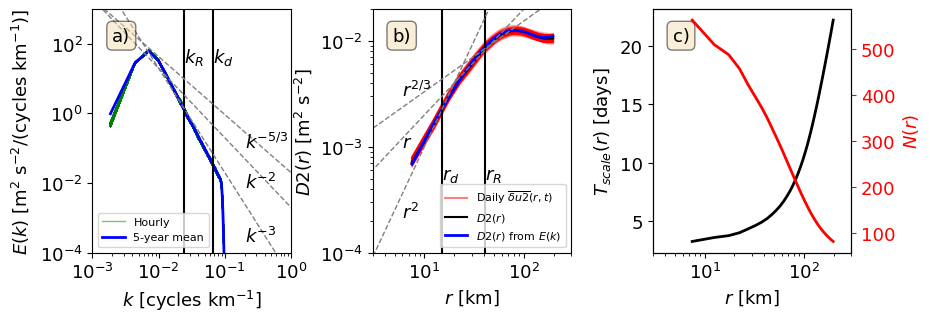

In [17]:
#### Plot
ks = np.array([1.e-4,1])
Es2 = .2e-2*(ks**(-2))
Es3 = .2e-4*(ks**(-3))
Es53 = .2e-1*(ks**(-5/3))

fug = plt.figure(figsize=(9.5, 3.5))

plt.subplot(1, 3, 1)
plt.loglog(ekeiso1y.freq_r*1e3, ekeiso1y.T, color='green', alpha=0.5, 
           linewidth=1)
plt.loglog([], [], color='green', alpha=0.5, label='Hourly',
           linewidth=1)
plt.loglog(ekeiso0.freq_r*1e3, ekeiso0.mean(dim='time'), '-', color='blue', 
           label='5-year mean', linewidth=2)
plt.plot(np.ones((2,))*1/rd*1e3, [1e-40, 1e4], '-k')
# plt.plot(np.ones((2,))*kny*1e3*0.65, [1e-40, 1e4], '--k')
plt.plot(np.ones((2,))*krh*1e3, [1e-40, 1e4], '-k')
plt.plot(ks, Es2, '--', color='gray', linewidth=1)
plt.plot(ks, Es3, '--', color='gray', linewidth=1)
plt.plot(ks, Es53, '--', color='gray', linewidth=1)
plt.text(2e-1, 7e-3, '$k^{-2}$')
plt.text(2e-1, 2e-4, '$k^{-3}$')
plt.text(2e-1, 1e-1, '$k^{-5/3}$')
plt.text(1/rd*1e3, 30, '$k_d$')
plt.text(krh*1e3, 30, '$k_{R}$')
plt.ylim(1e-4, 1e3)
plt.xlim(1e-3, 1e0)
plt.ylabel('$E(k)$ [m$^2$ s$^{-2}$/(cycles km$^{-1})$]')
plt.xlabel('$k$ [cycles km$^{-1}$]')
plt.text(0.1, 0.87, 'a)', bbox=props, transform=plt.gca().transAxes)
plt.legend(loc=3, fontsize=8)


plt.subplot(1, 3, 2)
plt.loglog(0, 0, color='r', alpha=0.5, label='Daily $\\overline{\\delta u2}(r, t)$')
plt.loglog(rr3*1e-3, mSF_15.du2.isel(mid_rbins=np.arange(indx, indf)).values.T, 
           color='r', alpha=0.01)
plt.loglog(rr3*1e-3, sf2_mean, color='k', label='$D2(r)$')
plt.fill_between(rr3*1e-3, sf2_mean + sf2_std/nu3, sf2_mean - sf2_std/nu3, edgecolor=None, 
                 color='k', alpha=0.2)
plt.loglog(rr3*1e-3, sf2_EKEiso*2, color='blue', linewidth=2, 
           label='$D2(r)$ from $E(k)$')
plt.plot(np.ones((2,))*rd*1e-3, [1e-40, 1e0], '-k')
plt.plot(np.ones((2,))*1e-3/krh, [1e-40, 1e0], '-k')
plt.plot(np.arange(1, 300, 10), np.arange(1, 300, 10)**(2)/(1e5), '--', linewidth=1, color='gray')
plt.plot(np.arange(1, 300, 10), np.arange(1, 300, 10)/5e3, '--', linewidth=1, color='gray')
plt.plot(np.arange(1, 300, 10), np.arange(1, 300, 10)**(2/3)/1.4e3, '--', linewidth=1, color='gray')
plt.text(rd*1e-3, 5e-4, '$r_d$')
plt.text(1e-3/krh, 5e-4, '$r_R$')
plt.text(6e0, 2.1e-4, '$r^2$')
plt.text(6e0, 1e-3, '$r$')
plt.text(6e0, 3e-3, '$r^{2/3}$')
plt.xlim(3e0, 3e2)
plt.ylim(1e-4, 2e-2)
plt.ylabel('$D2(r)$ [m$^2$ s$^{-2}$]')
plt.xlabel('$r$ [km]')
plt.text(0.1, 0.87, 'b)', bbox=props, transform=plt.gca().transAxes)
plt.legend(loc=4, fontsize=8)

s1 = plt.subplot(1, 3, 3)
plt.semilogx(rr3*1e-3, qg_tscale3/86400, '-', color='black', linewidth=2)
plt.xlim(3e0, 3e2)
plt.ylabel('$T_{scale}(r)$ [days]')
plt.xlabel('$r$ [km]')
s1a = plt.twinx(s1)
s1a.semilogx(rr3*1e-3, qg_dof, '-', color='red', linewidth=2)
s1a.set_xlim(3e0, 3e2)
s1a.set_ylabel('$N(r)$', color='red')
s1a.tick_params(axis='y', colors='red')


s1.text(0.1, 0.87, 'c)', bbox=props, transform=plt.gca().transAxes)

plt.tight_layout(w_pad=-0.8)
fug.savefig('./FiguresMethodsPaper/fig_qg_spectrum_N.png', bbox_inches='tight', format='png', dpi=500)

# Prior uncertaintity in the third-order structure function

Here, we defined the third-order structure function as an ensemble average of all raw samples over all orientations, positions and time

\begin{equation}
    D3(r) = D3_{LLL}(r) + D3_{LTT}(r)= \langle \delta u_{L}(\mathbf{s},\mathbf{r}, t)[\delta u^2_{L}(\mathbf{s},\mathbf{r}, t) + \delta u^2_{T}(\mathbf{s},\mathbf{r}, t)]\rangle,
\end{equation}


### PDFs from samples of third-order structure function $\delta u3(\mathbf{s}, \mathbf{r}, t)$ for selected $r$ bins

##### Here we defined the raw samples as

\begin{equation}
    \delta u3(\mathbf{s}, \mathbf{r}, t) = \delta u_{L}(\mathbf{s},\mathbf{r}, t)[\delta u^2_{L}(\mathbf{s},\mathbf{r}, t) + \delta u^2_{T}(\mathbf{s},\mathbf{r}, t)]
\end{equation}

Here, PDFs are calculated from the raw samples that are used to calculate $D3(r)$ for selected $r$ bins to show that the probability distribution is non-Gaussian. Gaussian statistics are required to use the regularized least-squares fitting.

In [18]:
import glob
import os

# Set the path to the folder containing the .nc files
folder_path = '/data/SO3/manuelogv/MethodsKEFlux/rawBinnedVelDiff/'

# Use glob to get a list of all .nc files in the folder
nc_files = glob.glob(os.path.join(folder_path, 'dudl*.nc'))

allSF = xr.open_mfdataset(nc_files, combine='by_coords', 
                            chunks={'x': 256, 'y': 256, 'dcorr': 2000, 'time': 100})

In [19]:
allSF = allSF.sortby('time').sortby('dcorr')
allSF1y = allSF.isel(time=np.arange(0, 150))
allSF1y

<xarray.Dataset>
Dimensions:  (x: 256, y: 256, time: 150, dcorr: 3599)
Coordinates:
    lev      int64 1
  * x        (x) float64 1.953e+03 5.859e+03 9.766e+03 ... 9.941e+05 9.98e+05
  * y        (y) float64 1.953e+03 5.859e+03 9.766e+03 ... 9.941e+05 9.98e+05
  * time     (time) float64 4.642e+08 4.643e+08 4.644e+08 ... 4.77e+08 4.771e+08
Dimensions without coordinates: dcorr
Data variables:
    dr       (dcorr, x, y, time) float64 dask.array<chunksize=(2000, 256, 256, 2), meta=np.ndarray>
    ulls     (dcorr, x, y, time) float64 dask.array<chunksize=(2000, 256, 256, 2), meta=np.ndarray>
    utts     (dcorr, x, y, time) float64 dask.array<chunksize=(2000, 256, 256, 2), meta=np.ndarray>

In [20]:
# Computes third-order statistics
_, sf3 = SF2_3(allSF1y['ulls'], allSF1y['utts'])

with ProgressBar():
    allSF1y['du3'] = sf3.compute()

[########################################] | 100% Completed | 18m 17s


In [21]:
allSF1y = allSF1y.chunk({'time': 100, 'x': 256, 'y': 256, 'dcorr': 50})
allSF1y

<xarray.Dataset>
Dimensions:  (x: 256, y: 256, time: 150, dcorr: 3599)
Coordinates:
    lev      int64 1
  * x        (x) float64 1.953e+03 5.859e+03 9.766e+03 ... 9.941e+05 9.98e+05
  * y        (y) float64 1.953e+03 5.859e+03 9.766e+03 ... 9.941e+05 9.98e+05
  * time     (time) float64 4.642e+08 4.643e+08 4.644e+08 ... 4.77e+08 4.771e+08
Dimensions without coordinates: dcorr
Data variables:
    dr       (dcorr, x, y, time) float64 dask.array<chunksize=(50, 256, 256, 100), meta=np.ndarray>
    ulls     (dcorr, x, y, time) float64 dask.array<chunksize=(50, 256, 256, 100), meta=np.ndarray>
    utts     (dcorr, x, y, time) float64 dask.array<chunksize=(50, 256, 256, 100), meta=np.ndarray>
    du3      (dcorr, x, y, time) float64 dask.array<chunksize=(50, 256, 256, 100), meta=np.ndarray>

In [22]:
# # Checks the list of groups
# rbins = np.arange(1e0, 3e5, 4e3)
# mid_rbins = 0.5*(rbins[0:-1] + rbins[1:])

# with ProgressBar():
#     rpl = allSF1y.dr.isel(time=0).mean(dim=('x','y')).values

In [51]:
# Calculates Hovmuller diagrams of probability density for specific $r$ bins
from xhistogram.xarray import histogram
d3h = 0.1 # du3 bin resolution

with ProgressBar():
#     du3_std = allSF1y.du3.isel(dcorr=0).std(dim=('x','y')).compute() # Calculates std deviation at each time step
#     du3_mn = allSF1y.du3.isel(dcorr=0).mean(dim=('x','y')).compute() # Calculates mean
#     du3_nstd = allSF1y.du3.isel(dcorr=0)/du3_std # Normalizes du3 by standard deviation
    
    du3_std0 = allSF1y.du3.isel(dcorr=20).std(dim=('x','y')).compute()
    du3_mn0 = allSF1y.du3.isel(dcorr=20).mean(dim=('x','y')).compute()
    du3_nstd0 = allSF1y.du3.isel(dcorr=20)/du3_std0
    
    du3_std1 = allSF1y.du3.isel(dcorr=10).std(dim=('x','y')).compute()
    du3_mn1 = allSF1y.du3.isel(dcorr=10).mean(dim=('x','y')).compute()
    du3_nstd1 = allSF1y.du3.isel(dcorr=10)/du3_std0
    
    # Histograms
#     histD3s1ya = histogram(du3_nstd, bins=np.arange(-80, 80, d3h),
#                            density=True, dim=['x','y']).compute()
    histD3s1yb = histogram(du3_nstd0, bins=np.arange(-80, 80, d3h),
                           density=True, dim=['x','y']).compute()
    histD3s1yc = histogram(du3_nstd1, bins=np.arange(-80, 80, d3h),
                           density=True, dim=['x','y']).compute()
    
#     dr_ma = allSF1y.dr.isel(dcorr=0, x=10, time=0).mean().compute()
    dr_mb = allSF1y.dr.isel(dcorr=20, x=10, time=0).mean().compute()
    dr_mc = allSF1y.dr.isel(dcorr=10, x=10, time=0).mean().compute()

[########################################] | 100% Completed | 101.59 ms
[########################################] | 100% Completed | 100.82 ms
[########################################] | 100% Completed | 103.06 ms
[########################################] | 100% Completed | 100.79 ms
[########################################] | 100% Completed | 100.84 ms
[########################################] | 100% Completed | 100.85 ms
[########################################] | 100% Completed | 302.23 ms
[########################################] | 100% Completed | 301.96 ms
[########################################] | 100% Completed | 301.75 ms
[########################################] | 100% Completed | 43.31 s
[########################################] | 100% Completed | 39.02 s
[########################################] | 100% Completed | 34.30 s


In [74]:
# Calculates Gaussian distribution from mean and standard deviation
from scipy.stats import norm

tfi = 10
tff = 110

gauss_h1ya = norm.pdf(histD3s1ya.du3_bin, du3_mn0.isel(time=tfi)/du3_std0.isel(time=tfi), 1)
gauss_h1yb = norm.pdf(histD3s1ya.du3_bin, du3_mn0.isel(time=tff)/du3_std0.isel(time=tff), 1)
gauss_h1yc = norm.pdf(histD3s1yc.du3_bin, du3_mn1.isel(time=tfi)/du3_std1.isel(time=tfi), 1)
gauss_h1yd = norm.pdf(histD3s1yc.du3_bin, du3_mn1.isel(time=tff)/du3_std1.isel(time=tff), 1)

/tmp/ipykernel_1080536/628237930.py:99: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(w_pad=-0.01, h_pad=0.01)


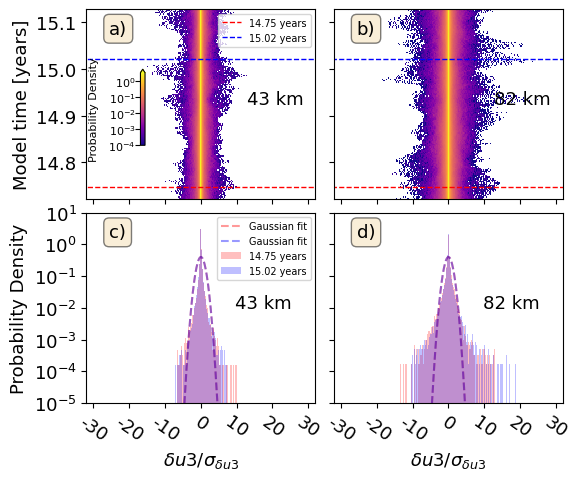

In [83]:
xbins, ybins = np.meshgrid(histD3s1ya.du3_bin, histD3s1ya.time/86400/365)

# Create the figure and axis grid
fig, axs = plt.subplots(2, 2, figsize=(6, 5), sharex=True)

# Plot the first row
# (1, 1)
cax1 = axs[0, 0].pcolormesh(xbins, ybins, histD3s1yc, norm=matplotlib.colors.LogNorm(vmin=1e-4), cmap='plasma')
axs[0, 0].plot([-80, 80], np.ones((2,))*histD3s1yc.time.values[tfi]/86400/365, '--r', linewidth=1,
              label="{:.2f} years".format(histD3s1yc.time[tfi].values/86400/365))
axs[0, 0].plot([-80, 80], np.ones((2,))*histD3s1yc.time.values[tff]/86400/365, '--b', linewidth=1,
              label="{:.2f} years".format(histD3s1yc.time[tff].values/86400/365))
axs[0, 0].set_ylabel('Model time [years]')
axs[0, 0].text(0.1, 0.87, 'a)', bbox=props, transform=axs[0, 0].transAxes)
axs[0, 0].set_xlabel('')
axs[0, 0].set_xticks(np.arange(-50, 60, 10))
axs[0, 0].set_yticks(np.arange(14.7, 15.4, 0.1))
axs[0, 0].set_ylim(histD3s1yc.time[0]/86400/365, histD3s1yc.time[-1]/86400/365)
axs[0, 0].set_xlim(-32, 32)
axs[0, 0].text(0.7, 0.5, "{:.0f} km".format(dr_mc.values*1e-3), transform=axs[0, 0].transAxes)
axs[0,  0].legend(fontsize=7)


# Colorbar
caxi = inset_axes(
    axs[0, 0],
    width="2%",  # width: 50% of parent_bbox width
    height="40%",  # height: 5%
    loc="lower left", borderpad=3,
)
cbi = plt.colorbar(cax1, cax=caxi, orientation="vertical", extend="max")
# Change tick position to top (with the default tick position "bottom", ticks
# overlap the image).
caxi.yaxis.set_ticks_position("left")
cbi.set_ticks([1e-4, 1e-3, 1e-2, 1e-1, 1e0])
cbi.ax.tick_params(labelsize=8, rotation=0, pad=0)
caxi.set_ylabel('Probability Density', labelpad=-40, fontsize=8)

# (1, 3)
cax3 = axs[0, 1].pcolormesh(xbins, ybins, histD3s1yb, norm=matplotlib.colors.LogNorm(), cmap='plasma')
axs[0, 1].plot([-80, 80], np.ones((2,))*histD3s1yb.time.values[tfi]/86400/365, '--r', linewidth=1,
              label="{:.2f} years".format(histD3s1yb.time[tfi].values/86400/365))
axs[0, 1].plot([-80, 80], np.ones((2,))*histD3s1yb.time.values[tff]/86400/365, '--b', linewidth=1,
              label="{:.2f} years".format(histD3s1yb.time[tff].values/86400/365))
axs[0, 1].set_yticklabels([])  # Remove y-tick labels for this plot
axs[0, 1].set_xticklabels([])  # Remove y-tick labels for this plot
axs[0, 1].text(0.1, 0.87, 'b)', bbox=props, transform=axs[0, 1].transAxes)
axs[0, 1].set_xlabel('')
axs[0, 1].set_ylabel('')
axs[0, 1].set_xticks(np.arange(-50, 60, 10))
axs[0, 1].set_yticks(np.arange(14.7, 15.4, 0.1))
axs[0, 1].set_ylim(histD3s1yc.time[0]/86400/365, histD3s1yc.time[-1]/86400/365)
axs[0, 1].set_xlim(-32, 32)
axs[0, 1].text(0.7, 0.5, "{:.0f} km".format(dr_mb.values*1e-3), transform=axs[0, 1].transAxes)


# Plot the second row
# (2, 1)
axs[1, 0].bar(histD3s1ya.du3_bin, histD3s1yc.isel(time=tfi), width=d3h, color='red', alpha=0.25,
              label="{:.2f} years".format(histD3s1yc.time[tfi].values/86400/365))
axs[1, 0].bar(histD3s1ya.du3_bin, histD3s1yc.isel(time=tff), width=d3h, color='blue', alpha=0.25,
              label="{:.2f} years".format(histD3s1yc.time[tff].values/86400/365))
axs[1, 0].plot(histD3s1ya.du3_bin, gauss_h1ya, '--', color='red', alpha=0.4,
              label="Gaussian fit")
axs[1, 0].plot(histD3s1ya.du3_bin, gauss_h1yb, '--', color='blue', alpha=0.4,
              label="Gaussian fit")
axs[1, 0].set_xlabel('$\\delta u3/\\sigma_{\\delta u3}$')
axs[1, 0].set_yscale('log')
axs[1, 0].text(0.1, 0.87, 'c)', bbox=props, transform=axs[1, 0].transAxes)
axs[1, 0].set_xticks(np.arange(-50, 60, 10))
axs[1, 0].set_xticklabels(axs[1, 0].get_xticks(), rotation=-35)
axs[1, 0].set_ylabel('Probability Density')
axs[1, 0].set_yticks([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1])
axs[1, 0].set_xlim(-45, 45)
axs[1, 0].set_ylim(1e-5, 1e1)
axs[1, 0].text(0.65, 0.5, "{:.0f} km".format(dr_mc.values*1e-3), transform=axs[1, 0].transAxes)
axs[1, 0].legend(fontsize=7)

# (2, 3)
axs[1, 1].bar(histD3s1ya.du3_bin, histD3s1yb.isel(time=tfi), width=d3h, color='red', alpha=0.25)
axs[1, 1].bar(histD3s1ya.du3_bin, histD3s1yb.isel(time=tff), width=d3h, color='blue', alpha=0.25)
axs[1, 1].plot(histD3s1ya.du3_bin, gauss_h1yc, '--', color='red', alpha=0.4,
              label="Gaussian fit")
axs[1, 1].plot(histD3s1ya.du3_bin, gauss_h1yd, '--', color='blue', alpha=0.4,
              label="Gaussian fit")
axs[1, 1].set_yscale('log')
axs[1, 1].set_xlabel('$\\delta u3/\\sigma_{\\delta u3}$')
axs[1, 1].text(0.1, 0.87, 'd)', bbox=props, transform=axs[1, 1].transAxes)
axs[1, 1].set_xticks(np.arange(-50, 60, 10))
axs[1, 1].set_xticklabels(axs[1, 1].get_xticks(), rotation=-35)
axs[1, 1].set_yticks([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1])
axs[1, 1].set_yticklabels([])  # Remove y-tick labels for this plot
axs[1, 1].set_xlim(-32, 32)
axs[1, 1].set_ylim(1e-5, 1e1)
axs[1, 1].text(0.65, 0.5, "{:.0f} km".format(dr_mb.values*1e-3), transform=axs[1, 1].transAxes)


# Adjust layout to avoid overlap
plt.tight_layout(w_pad=-0.01, h_pad=0.01)
plt.savefig('./FiguresMethodsPaper/fig_qg_du3hist_raw_N.png', bbox_inches='tight', format='png', dpi=500)

### Alternative approach for uncertainty

Clearly, the raw samples $\delta u3(\mathbf{s}, \mathbf{r}, t)$ are not Gaussian-distributed. Therefore, we must look for an alternative approach to estimate the prior uncertainty in $D3(r)$.

We average $\delta u3(\mathbf{s}, \mathbf{r}, t)$ over all orientations and positions $\mathbf{s}$ per time step to calculate $\overline{\delta u3}(r, t)$, where the $\overline{()}$ indicates spatial average. Per central limit theorem, we expect that the averaged samples are Gaussian distributed.

In [32]:
# Means and std deviations of 5-year structure functions
sf3_mn3 = mSF_15.du3.mean(dim='time').values[indx:indf]
sf3_std3 = mSF_15.du3.std(dim='time').values[indx:indf]
du3 = mSF_15.du3.isel(mid_rbins=np.arange(indx, indf))

# Selected indexes
o0 = 2
o1 = 5
o2 = 18
o3 = 25

drh = 0.4

# Histograms
d3s_bin0 = np.arange(-4, 4, drh)#np.arange(-1e-3, 1e-3, 1e-6)/sf3_std3[o0]
d3s_bin1 = np.arange(-4, 4, drh)#np.arange(-1e-4, 1e-4, 3e-6)/sf3_std3[o1]
d3s_bin2 = np.arange(-4, 4, drh)#np.arange(-1e-3, 1e-3, 2e-5)/sf3_std3[o2]
d3s_bin3 = np.arange(-4, 4, drh)#np.arange(-1e-3, 1e-3, 1e-5)/sf3_std3[o3]

gh0 = histogram(du3.isel(mid_rbins=o0)/sf3_std3[o0], bins=d3s_bin0, density=True)
gh2 = histogram(du3.isel(mid_rbins=o1)/sf3_std3[o1], bins=d3s_bin1, density=True)
gh10 = histogram(du3.isel(mid_rbins=o2)/sf3_std3[o2], bins=d3s_bin2, density=True)
gh20 = histogram(du3.isel(mid_rbins=o3)/sf3_std3[o3], bins=d3s_bin3, density=True)

# Constructs Gaussian
g0 = norm.pdf(d3s_bin0, sf3_mn3[o0]/sf3_std3[o0], 1)
g2 = norm.pdf(d3s_bin1, sf3_mn3[o1]/sf3_std3[o1], 1)
g10 = norm.pdf(d3s_bin2, sf3_mn3[o2]/sf3_std3[o2], 1)
g20 = norm.pdf(d3s_bin3, sf3_mn3[o3]/sf3_std3[o3], 1)

In [33]:
# Calculates Kurtosis and Skewness
sf3_skew = skew(du3.values, axis=0, bias=True)
sf3_kurt = kurtosis(du3.values, axis=0, fisher=True, bias=True)

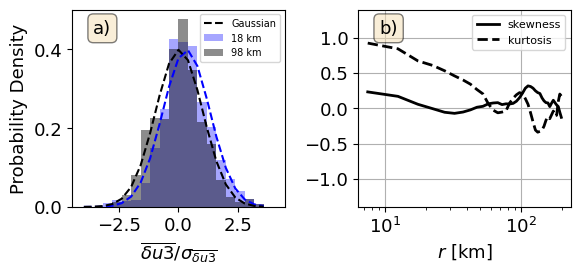

In [34]:
# Plots histograms
colors = plt.cm.jet(np.linspace(0, 1, 4))

fog0 = plt.figure(figsize=(6, 3))
a0a = plt.subplot(1, 2, 1)
plt.bar(gh0.du3_bin, gh0, width=drh, label="{:2.0f} km".format(rr1[o0]*1e-3), 
        color='b', edgecolor=None, alpha=0.35)
plt.plot(d3s_bin0, g0, '--', color='blue')
plt.bar(gh10.du3_bin, gh10, width=drh, label="{:2.0f} km".format(rr1[o2]*1e-3), 
        color='k', edgecolor=None, alpha=0.45)
plt.plot(d3s_bin2, g10, '--', color='black', label='Gaussian')
plt.legend(fontsize=7, loc=1)
plt.xlim(-4.5, 4.5)
a0a.set_ylabel('Probability Density')
a0a.set_xlabel('$\\overline{\\delta u3}/\\sigma_{\\overline{\\delta u3}}$')
a0a.text(0.1, 0.88, 'a)', bbox=props, transform=a0a.transAxes)


a0b = plt.subplot(1, 2, 2)
a0b.semilogx(rr1*1e-3, sf3_skew, '-k', linewidth=2, label='skewness')
a0b.semilogx(rr1*1e-3, sf3_kurt, '--k', linewidth=2, label='kurtosis')
a0b.set_yticks(np.arange(-1.5, 2, 0.5))
a0b.set_ylim(-1.4, 1.4)
a0b.legend(fontsize=8)
a0b.set_xlabel('$r$ [km]')
a0b.text(0.1, 0.88, 'b)', bbox=props, transform=a0b.transAxes)
a0b.grid()


fog0.tight_layout()
plt.savefig('./FiguresMethodsPaper/fig_qg_hist_du3_N.png', bbox_inches = 'tight', format='png', dpi=500)

# KE transfers (fluxes)

First, we calculate the spectral fluxes as:

\begin{equation}
    D3(r)= 2\epsilon_u r - \sum^{N_k}_{j=1} 4\frac{\epsilon_j}{k_j}J_1(k_fr)dk_j
\end{equation}

using the regularized least-squares: 

\begin{equation}
    \hat{\mathbf{x}} = \big(\mathbf{H}^\text{T} \mathbf{W}^{-1} \mathbf{H} + \mathbf{P}^{-1}\big)^{-1} \mathbf{H}^\text{T} \mathbf{W}^{-1} \mathbf{y}
\end{equation}


We compare the cross-scale KE transfers using the structure-function method and regularized least-squares with those estimated using the spectral method (Ayaji et al. 2020):

\begin{align}
F_\Pi(k) = -\int^{k_1}_{k_2}\text{Re}\big[\hat{\mathbf{u}}^\ast\cdot\widehat{(\mathbf{u}\cdot\nabla_{H}\mathbf{u})}\big]dk
\end{align}

In [35]:
# Spectral fluxes following Ayaji using 5 years only
wind = 0  # no windowing
detr = 0  # no detrend

# Assuming eddyrun_lev is a preloaded xarray dataset
un = eddyrun_lev.u.isel(lev=0, time=time3y).chunk({'time': 100, 'x': 256, 'y': 256})
vn = eddyrun_lev.v.isel(lev=0, time=time3y).chunk({'time': 100, 'x': 256, 'y': 256})

Nx, Ny = un.isel(time=0).shape

# Defines wavenumbers
kx = np.fft.fftfreq(Nx, dx)
ky = np.fft.fftfreq(Ny, dy)
Kmax = max(kx.max(), ky.max())
kk, ll = np.meshgrid(kx, ky)
K2D = np.sqrt(kk**2 + ll**2)
ddk = 1./(dx*Nx)
ddl = 1./(dy*Ny)
dK0 = max(ddk, ddl)
K1D0 = dK0 * np.arange(1, int(Kmax / dK0))

# Calculates spectral flux
Nk = len(K1D0)
Nt = len(un.time)

flux = np.zeros((Nt, Nk))

def calculate_flux(ii):
    return spectralFlux(un.isel(time=ii).values, vn.isel(time=ii).values, x, y, wind, detr)

# Parallelize the computation using ThreadPoolExecutor
with ThreadPoolExecutor() as executor:
    results = list(tqdm(executor.map(calculate_flux, range(Nt)), total=Nt))

# Unpack results into flux array
for ii, result in enumerate(results):
    K1D, flux[ii, :] = result

specFlux_mean = np.mean(flux, axis=0)
specFlux_std = np.std(flux, axis=0)

100%|███████████████████████████████████████| 1825/1825 [03:16<00:00,  9.28it/s]


In [36]:
km1 = 0.5*(K1D[1:] + K1D[:-1])
dkm1 = np.mean(np.diff(K1D, axis=0))
i0f = -32

dF1_mean = np.mean(np.diff(flux, axis=1), axis=0)
dF1_std = np.std(np.diff(flux, axis=1), axis=0)
dF1_erru = dF1_mean + dF1_std/nu3[i0f]
dF1_errl = dF1_mean - dF1_std/nu3[i0f]

### Prior uncertainty in $D3(r)$ and $\epsilon_u$, $\epsilon_j$

For the prior uncertainty in $D3(r)$, we calculate the standard error, i.e., the standard deviation
calculated from $\overline{\delta u3}(r,t)$ divided by the degrees of freedom $N(r)$. We use 
$\overline{\delta u3}(r,t)$ as they are Gaussian distributed. Then, we set the weight matrix $\mathbf{P}$
as a square matrix with the squared standard error as the diagonal entries and zeros elsewhere.

To set the prior uncertainty in $\epsilon_u, \epsilon_j$ we use the L-curve approach, and find the value
that is the best trade-off $\lambda$ between minimizing the missfit $|D3(r) - \widetilde{D3}(r)|$, 
where $\widetilde{D3}(r)$ is the fitted structure function, and the norm two of the
fitted parameters $||\epsilon_j||$. Then, $\mathbf{P}$ is set as a square matrix with $\lambda$ 
(constant) in the diagonal and zeros elsewhere.

In [37]:
# Defines matrixes for 3 years inversion
from scipy.special import jv # Imports Bessel function 

dr3 = np.mean(np.diff(rr3))

# We use the same ones for the spectral method
k3 = K1D*2*np.pi
k3 = k3[k3<= 1/(dr3/2)]
dk3 = np.ones((len(k3),))*np.mean(np.diff(K1D))

nk3 = len(k3)
nr3 = len(rr3)

# Degrees of freedom
year = 86400*365. #seconds
tmax3 = year*nyears # 5 years in seconds

# Define H model matrix
A3 = defA(rr3, k3, dk3)

# Define W weights matrix
wgts3 = sf3_std3/nu3
W3 = np.diag(wgts3**2)

# Define P covariance matrix
fac = 1e-1
fac_epsj = 7e-10

P3 = np.concatenate(([fac*2], np.ones((nk3, ))*fac_epsj), axis=0)
P3 = np.diag(P3)

In [38]:
# Tests for choosing P matrix
from numpy.linalg import norm

# Define P covariance matrix
fac0 = np.logspace(-14, 10, 20)
po = np.logspace(-18, -2, 40)

norm2_eps = np.zeros((len(po), len(fac0)))
norm2_epsu = np.zeros((len(po), len(fac0)))
norm2_res = np.zeros((len(po), len(fac0)))
norm2_err = np.zeros((len(po), len(fac0)))
norm2_erru = np.zeros((len(po), len(fac0)))
norm2_P0 = np.zeros((len(po), len(fac0)))
# norm2_std = norm(wgts, 2)

for n in range(len(po)):
    for m in range(len(fac0)):
        
        P0_diag = np.concatenate(([fac0[m]], np.ones((nk3, ))*po[n]), axis=0)
        P0_test = np.diag(P0_diag)
    
        eps_test, sf3_test, res_test, cxx_test = RLS(sf3_mn3, W3, P0_test, A3)
        eps_err_test = np.sqrt(np.diag(cxx_test))
    
        norm2_eps[n, m] = norm(eps_test[1:], ord=2)
        norm2_epsu[n, m] = eps_test[0]**2
        norm2_res[n, m] = norm(res_test/wgts3, ord=2)
        norm2_err[n, m] = norm(eps_err_test[1:], ord=2)
        norm2_erru[n, m] = eps_err_test[0]**2
        norm2_P0[n, m] = norm(np.sqrt(P0_diag[1:]), ord=2)
        
# Finds index where fac_epsj == po
idx = np.abs(po - fac_epsj).argmin()

In [39]:
#### Calculates Kinetic Energy transfers

from scipy.optimize import nnls

###### Regularized Least-squares
eps3, V3_mn3, res3, cxx3 = RLS(sf3_mn3, W3, P3, A3)
err3 = np.diag(cxx3) # Errors in epsilon 
eps_err_u3 = eps3 + np.sqrt(err3)# Error upper bound
eps_err_l3 = eps3 - np.sqrt(err3)# Error lower 
Herr3 = defH(k3, dk3)
Fk_err3 = np.sqrt(np.diag(errorsFlux(cxx3, Herr3))) #Error energy flux
Fk3 = calcFk(eps3, k3, dk3) # Calculate F(k)

### Calculates $F(k)$ and $\epsilon_j$ using non-negative least-squares (NNLS) fits

NNLS allows only for positve fitted parameters ($\epsilon_j\geq0$), and assumes that $F(k)$ is a purely increasing function of $k$. 

To estimate the NNLS-based five-year mean $\widetilde{D3}(r)$, $\epsilon_u$, $\epsilon_j$, and $F(k)$, we first estimated the fitted structure function $\widetilde{D3}(r)$ by ensemble averaging $\overline{\delta u3}(r,t)$ and inverted it using NNLS. Subsequently, we inverted the daily $\overline{\delta u3}(r,t)$ time series to generate daily estimates used to calculate standard errors. The standard errors in $\widetilde{D3}(r)$, $F(k)$ and $\epsilon_j$ are calculated by estimating the standard deviation divided by $\sqrt{N}$ where $N$ is the degrees of freedom at the largest $r$.

In [40]:
# Non-negative least-squares for the mean
eps_nnls3 = nnls(A3, sf3_mn3)[0]    
V3_nnls3 = np.dot(A3, eps_nnls3) # reconstructed V3
res_nnls3 = V3_nnls3 - sf3_mn3 # residuals

# Calculate energy cascade
Fk_nnls3 = calcFk(eps_nnls3, k3, dk3)    

In [41]:
# Non-negative least-squares for each daily snapshot
sf3_all = du3.values
Ntr = len(mSF_15.time)

eps_nnls_all = np.zeros((Nt, nk3+1))
V3_nnls_all = np.zeros((Nt, nr3))
res_nnls_all = np.zeros((Nt, nr3))
Fk_nnls_all = np.zeros((Nt, nk3))

for ii in tqdm(range(Ntr)):
    eps_nnls_all[ii, :] = nnls(A3, sf3_all[ii, :])[0]    
    V3_nnls_all[ii, :] = np.dot(A3, eps_nnls_all[ii, :]) # reconstructed V3
    res_nnls_all[ii, :] = V3_nnls_all[ii, :] - sf3_all[ii, :] # residuals

    # Calculate energy cascade
    Fk_nnls_all[ii, :] = calcFk(eps_nnls_all[ii, :], k3, dk3)

# Standard deviation
eps_nnls_all_std = np.std(eps_nnls_all, axis=0)
Fk_nnls_all_std = np.std(Fk_nnls_all, axis=0)
V3_nnls_all_std = np.std(V3_nnls_all, axis=0)

eps_nnls3_eu = eps_nnls3[1:] + eps_nnls_all_std[1:]/nu3[-1]
eps_nnls3_el = eps_nnls3[1:] - eps_nnls_all_std[1:]/nu3[-1]
eps_nnls3_el[np.where(eps_nnls3_el<0)] = 0


100%|████████████████████████████████████| 1824/1824 [00:00<00:00, 12235.49it/s]


### Assuming that NNLS will fail to reproduce the full properties of the KE transfers 
### over the entire $r$ range, we fit $D3(r)$ a partial range.

The partial range is $r<60$ km; this is where we expect that $F(k)$ behaves as an increasing function of $k$

In [42]:
# Calculates F(k) using NNLS only for r<50 km
i0n = 0
i0f = -32
r0 = rr3[i0n:i0f]
dr0 = np.nanmean(np.diff(r0))

kf0 = np.arange(1/max(r0), 1/(dr0)+1/max(r0), 1/max(r0))
dk0 = np.diff(kf0)
k0 = kf0[1:]
# k = np.flipud(k)

nk0 = len(k0)
nr0 = len(r0)

# Define model matrix
A0 = defA(r0, k0, dk0)

# Define W weights matrix
wgts0 = sf3_std3[i0n:i0f]/nu3[i0n:i0f]
W0 = np.diag(wgts0**2)

# Non-negative least-squares fitting
eps_nnls0 = nnls(A0, sf3_mn3[i0n:i0f])[0]    
V3_nnls0 = np.dot(A0, eps_nnls0) # reconstructed V3
res_nnls0 = V3_nnls0 - sf3_mn3[i0n:i0f] # residuals

# Calculate energy cascade
Fk_nnls0 = calcFk(eps_nnls0, k0, dk0)

In [43]:
# Non-negative least-squares for each daily snapshot
sf3_r50 = du3.isel(mid_rbins=np.arange(i0n, nr3+i0f)).values

eps_nnls_r50 = np.zeros((Nt, nk0+1))
V3_nnls_r50 = np.zeros((Nt, nr0))
res_nnls_r50 = np.zeros((Nt, nr0))
Fk_nnls_r50 = np.zeros((Nt, nk0))

print(A0.shape)
print(sf3_r50.shape)

for ii in tqdm(range(Ntr)):
    eps_nnls_r50[ii, :] = nnls(A0, sf3_r50[ii, :])[0]    
    V3_nnls_r50[ii, :] = np.dot(A0, eps_nnls_r50[ii, :]) # reconstructed V3
    res_nnls_r50[ii, :] = V3_nnls_r50[ii, :] - sf3_r50[ii, :] # residuals

    # Calculate energy cascade
    Fk_nnls_r50[ii, :] = calcFk(eps_nnls_r50[ii, :], k0, dk0)

# Standard deviation
eps_nnls_r50_std = np.std(eps_nnls_r50, axis=0)
Fk_nnls_r50_std = np.std(Fk_nnls_r50, axis=0)
V3_nnls_r50_std = np.std(V3_nnls_r50, axis=0)

eps_nnls_r50_eu = (Fk_nnls0 + Fk_nnls_r50_std/nu3[i0f])
eps_nnls_r50_el = (Fk_nnls0 - Fk_nnls_r50_std/nu3[i0f])
eps_nnls_r50_el[np.where(eps_nnls_r50_el<0)] = 0

(7, 8)
(1824, 7)


100%|████████████████████████████████████| 1824/1824 [00:00<00:00, 48026.38it/s]


### Transforms from $F_\Pi(k)$ to $D3(r)$ using

\begin{equation}
    D3(r) = -4r\int_0^\infty \frac{1}{k}F_\Pi(k)J_2(kr)dk
\end{equation}

In [44]:
# Convert Spectral Flux to SF3 usin the Fourier transform relationship
k_spec = K1D

sf3_spec = Fk2SF3(specFlux_mean, K1D*2*np.pi, dK0*2*np.pi, rr3)

<!-- ### Calculates $S3 = <\delta u_L>(<\delta u_L>^2 + <\delta u_T>^2)$ -->

/tmp/ipykernel_1080536/341478104.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  axins.set_yticklabels(axins.get_yticks(), fontsize=6)
/tmp/ipykernel_1080536/341478104.py:142: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(h_pad=-0.08, w_pad=0.3)


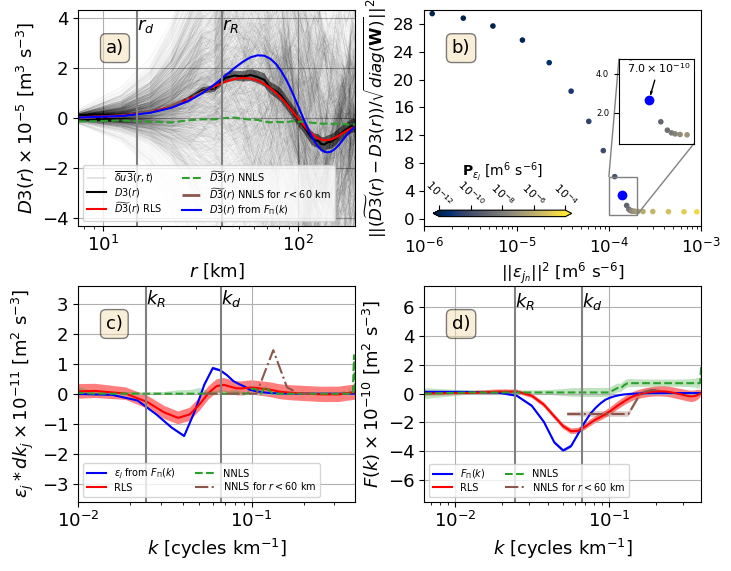

In [45]:
fign = plt.figure(figsize=(7.5, 5.9))
clr = '#2CA02C'

# Extract the exponent and base of the number
a, c = f"{fac_epsj:.1e}".split('e')

# Convert a and c to the appropriate values
a = float(a)  # Base 'a'
c = int(c)  # Exponent 'c'

# Create the LaTeX-style string representation
k_str = f"${a} \\times 10^{{{c}}}$"

plt.subplot(2, 2, 1)
plt.semilogx(rr3*1e-3, du3.T*1e5, color='k', alpha=0.03, linewidth=0.3)
plt.semilogx(1e0, 0, '-', color='gray', label='$\\overline{\\delta u3}(r, t)$', linewidth=0.3)
plt.semilogx(rr3*1e-3, sf3_mn3*1e5, color='k', label='$D3(r)$')
plt.semilogx(rr3*1e-3, V3_mn3*1e5, color='r', label='$\\widetilde{D3}(r)$ RLS')
plt.semilogx(rr3*1e-3, V3_nnls3*1e5, '--', color=clr, label='$\\widetilde{D3}(r)$ NNLS')
plt.semilogx(r0*1e-3, V3_nnls0*1e5, '-.', linewidth=2, 
             color='#8C564B', label='$\\widetilde{D3}(r)$ NNLS for $r<60$ km')
plt.semilogx(rr3*1e-3, sf3_spec*1e5, 'b', label='$D3(r)$ from $F_\\Pi(k)$')
plt.fill_between(rr3*1e-3, (sf3_mn3+wgts3)*1e5, (sf3_mn3-wgts3)*1e5, 
                 facecolor='black', edgecolor=None, alpha=0.5)
plt.plot(np.ones((2,))*rd*1e-3, [-4.3, 4.3], '-', color='gray')
plt.plot(np.ones((2,))*1e-3/krh, [-4.3, 4.3], '-', color='gray')
plt.text(rd*1e-3, 3.5, '$r_d$')
plt.text(1/krh*1e-3, 3.5, '$r_R$')
plt.xlim(rr3[0]*1e-3, max(rr3)*1e-3)
plt.ylim(-4.3, 4.3)
plt.xlabel('$r$ [km]')
plt.ylabel('$D3(r) \\times 10^{-5}$ [m$^3$ s$^{-3}$]')
plt.grid()
plt.text(0.1, 0.80, 'a)', bbox=props, transform=plt.gca().transAxes)
plt.legend(loc=3, fontsize=7, ncol=2, labelspacing = 0.15)

plt.subplot(2, 2, 2)
axi = plt.gca()
ei = axi.scatter(norm2_eps[:, 6], norm2_res[:, 6], c=po, cmap='cividis', 
                 s=9, norm=matplotlib.colors.LogNorm(vmin=1e-12, vmax=1e-4))
axi.plot(norm2_eps[idx, 6], norm2_res[idx, 6], 'ob', markerfacecolor=None, linewidth=0.1)
axi.set_xlabel('$||\\epsilon_{j_n}||^2$ [m$^6$ s$^{-6}$]', fontsize=12)
axi.set_ylabel('$||(\\widetilde{D3}(r) - D3(r))/\\sqrt{diag(\\mathbf{W})}||^2$', fontsize=12)
caxi = inset_axes(
    axi,
    width="50%",  # width: 50% of parent_bbox width
    height="3%",  # height: 5%
    loc="lower left",
)
cbi = fign.colorbar(ei, cax=caxi, orientation="horizontal", extend="both")
caxi.xaxis.set_ticks_position("top")
cbi.set_ticks([1e-12, 1e-10, 1e-8, 1e-6, 1e-4])
cbi.ax.tick_params(labelsize=8, rotation=-45, pad=-3)
caxi.set_xlabel('$\\mathbf{P}_{\\epsilon_j}$ [m$^6$ s$^{-6}$]', labelpad=-40,
                fontsize=10)
axi.set_xticks(10.**(np.arange(-10, 0, 1)))
axi.set_yticks(np.arange(0, 38 , 4))
axi.set_xticklabels(axi.get_xticks(), fontsize=12)
axi.set_yticklabels(axi.get_yticks().astype(int), fontsize=12)
axi.set_xscale('log')
axi.set_xticks(10.**(np.arange(-10, 0, 1)))
axi.set_ylim(-1, 30)
axi.set_xlim(1e-6, 0.1e-2)
axi.text(0.1, 0.80, 'b)', bbox=props, transform=axi.transAxes)

# Zoomed inset
axins = inset_axes(axi, 0.75, 0.85 , loc=1, bbox_to_anchor=(0.95, 0.90),
                   bbox_transform=axi.figure.transFigure) # no zoom
axins.scatter(norm2_eps[:, 6], norm2_res[:, 6], c=po, cmap='cividis', 
                 s=9, norm=matplotlib.colors.LogNorm(vmin=1e-12, vmax=1e-4))
axins.plot(norm2_eps[idx, 6], norm2_res[idx, 6], 'ob', markerfacecolor=None, linewidth=0.1)
axins.set_xlim(1e-4, 2e-4)
axins.set_ylim(0.5, 6)
axins.set_yticklabels(axins.get_yticks(), fontsize=6)
axins.set_xticks([], visible=False)
mark_inset(axi, axins, loc1=4, loc2=2, fc="none", ec="0.5")
axins.annotate(k_str, xy=(norm2_eps[idx, 6], norm2_res[idx, 6]), 
               xytext=(norm2_eps[idx, 6]-0.3e-4, norm2_res[idx, 6]+1.75),
               fontsize=8, arrowprops=dict(arrowstyle="-|>, head_width=0.1",mutation_scale=5, fc="k"))

plt.subplot(2, 2, 3)
plt.semilogx(km1*1e3*2*np.pi, dF1_mean/dkm1*1e10*dkm1, 'b', label='$\\epsilon_j$ from $F_\\Pi(k)$')
plt.fill_between(km1*1e3*2*np.pi, dF1_erru/dkm1*1e10*dkm1, dF1_errl/dkm1*1e10*dkm1, 
                 facecolor='blue', edgecolor=None, alpha=0.5)
plt.semilogx(k3*1e3, eps3[1:]*1e10*dk3, color='r', label='RLS')
plt.fill_between(k3*1e3, eps_err_u3[1:]*1e10*dk3, eps_err_l3[1:]*1e10*dk3, facecolor='red', 
                 edgecolor=None, alpha=0.5)
plt.semilogx(k3*1e3, eps_nnls3[1:]*1e10*dk3, '--', color=clr, label='NNLS')
plt.fill_between(k3*1e3, eps_nnls3_eu*1e10*dk3, 
                 eps_nnls3_el*1e10*dk3, 
                 facecolor=clr, edgecolor=None, alpha=0.3)
plt.semilogx(k0*1e3, eps_nnls0[1:]*1e10*dk0, '-.', label='NNLS for $r<60$ km',
            color='#8C564B')
plt.fill_between(k0*1e3, eps_nnls_r50_eu*1e10*dk0, 
                 eps_nnls_r50_el*1e10*dk0, 
                 facecolor='#8C564B', edgecolor=None, alpha=0.3)
plt.plot(np.ones((2,))/rd*1e3, [-3.6, 3.6], '-', color='gray')
plt.plot(np.ones((2,))*krh*1e3, [-3.6, 3.6], '-', color='gray')
plt.text(1/rd*1e3, 3, '$k_d$')
plt.text(krh*1e3, 3, '$k_R$')
plt.xlim(np.min(k3)*1e3, np.max(k3)*1e3)
plt.gca().set_yticks(np.arange(-4, 5, 1))
plt.ylim(-3.6, 3.6)
plt.xlim(1e-2, )
plt.ylabel('$\\epsilon_j*dk_j \\times 10^{-11}$ [m$^2$ s$^{-3}$]')
plt.xlabel('$k$ [cycles km$^{-1}$]')
plt.text(0.1, 0.80, 'c)', bbox=props, transform=plt.gca().transAxes)
plt.grid()
plt.legend(loc=3, fontsize=7, ncol=2, labelspacing = 0.15)

plt.subplot(2, 2, 4)
plt.semilogx(K1D*1e3*2*np.pi, specFlux_mean*1e10, '-b', label='$F_\\Pi(k)$')
plt.fill_between(K1D*1e3*2*np.pi, (specFlux_mean + specFlux_std/nu3[-1])*1e10, 
                 (specFlux_mean - specFlux_std/nu3[-1])*1e10, 
                 facecolor='blue', edgecolor=None, alpha=0.5)
plt.semilogx(k3*1e3, Fk3*1e10, '-', color='r', label='RLS')
plt.fill_between(k3*1e3, (Fk3 + Fk_err3)*1e10, (Fk3 - Fk_err3)*1e10, 
                 facecolor='red', edgecolor=None, alpha=0.5)
plt.semilogx(k3*1e3, Fk_nnls3*1e10, '--', color=clr, label='NNLS')
plt.fill_between(k3*1e3, (Fk_nnls3 + Fk_nnls_all_std/nu3[-1])*1e10,
                 (Fk_nnls3 - Fk_nnls_all_std/nu3[-1])*1e10, 
                 facecolor=clr, edgecolor=None, alpha=0.3)
plt.semilogx(k0*1e3, Fk_nnls0*1e10, '-.', label='NNLS for $r<60$ km',
            color='#8C564B')
plt.fill_between(k0*1e3, (Fk_nnls0 + Fk_nnls_r50_std/nu3[i0f])*1e10, 
                 (Fk_nnls0 - Fk_nnls_r50_std/nu3[i0f])*1e10, 
                 facecolor='#8C564B', edgecolor=None, alpha=0.3)
plt.plot(np.ones((2,))/rd*1e3, [-7.5, 7.5], '-', color='gray')
plt.plot(np.ones((2,))*krh*1e3, [-7.5, 7.5], '-', color='gray')
plt.text(1/rd*1e3, 6, '$k_d$')
plt.text(krh*1e3, 6, '$k_R$')
plt.gca().set_yticks(np.arange(-8, 10, 2))
plt.xlim(np.min(k3)*1e3, np.max(k3)*1e3)
plt.ylim(-7.5, 7.5)
plt.ylabel('$F(k) \\times 10^{-10}$ [m$^2$ s$^{-3}$]')
plt.xlabel('$k$ [cycles km$^{-1}$]')
plt.text(0.1, 0.80, 'd)', bbox=props, transform=plt.gca().transAxes)
plt.legend(loc=3, fontsize=7, ncol=2, labelspacing = 0.15)
plt.grid()


plt.tight_layout(h_pad=-0.08, w_pad=0.3)
plt.savefig('./FiguresMethodsPaper/fig_qg_du3_Feps_N.png', bbox_inches = 'tight', format='png', dpi=500)